# CMIP6 Historical Prediction

In [ ]:
import os
import sys
import matplotlib.pyplot as plt
import pickle

In [ ]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

c:\Users\marti\Desktop\data\hw_extra


## Load cmip6 drivers

In [ ]:
import tensorflow as tf
import os
import numpy as np
import random
import keras
SEED = 42

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    keras.utils.set_random_seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU, Conv1D, Flatten, Reshape
import sys


In [ ]:
from Predictions import (
    PredictionModel,
    SERA,
)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Load Data

In [5]:
path_drivers = "data/03_primary/drivers/dfs_dict.pickle"
with open(path_drivers, 'rb') as handle:
    models_df = pickle.load(handle)

In [6]:
hws_chile = pd.read_csv("data/local_data/monthly/hws_chile_library.csv")

hws_chile["time"] = pd.to_datetime(hws_chile["Unnamed: 0"],format='%Y-%m')
hws_chile.set_index('time', inplace=True)
hws_chile.drop(columns="Unnamed: 0", inplace=True)
hws_chile

,hwn,hwf,hwd,hwm,hwa
time,,,,,
1971-01-01,0.0,0.0,0.0,0.000000,0.000000
1971-02-01,0.2,0.7,0.7,0.447148,0.807169
1971-03-01,0.0,0.0,0.0,0.000000,0.000000
1971-04-01,0.2,0.6,0.6,0.637038,0.982249
1971-05-01,0.1,0.3,0.3,0.555671,0.901254
...,...,...,...,...,...
2023-08-01,0.3,1.0,1.0,0.902918,1.456688
2023-09-01,0.0,0.0,0.0,0.000000,0.000000
2023-10-01,0.1,0.3,0.3,0.062737,0.077569


In [7]:
era5_df = pd.concat((models_df["ERA5"],hws_chile),axis=1)
era5_df

,nino12,nino34,anom_wind_cl_raco,anom_wind_cl_puelche,anom_wind_pressure,anom_ta_cl,anom_pdo,anom_psl_sam_40,anom_psl_sam_65,anom_dmi_east,...,longitude,pressure,high_low_difference,adv_blob,adv_chile,hwn,hwf,hwd,hwm,hwa
time,,,,,,,,,,,,,,,,,,,,,
1971-01-01,-1.928113,-1.640253,0.006237,1.624297,-155.360306,1.249381,0.997573,-112.387703,341.377930,0.051705,...,255.00,102347.242188,-67.718750,-1.075192,5.139239,0.0,0.0,0.0,0.000000,0.000000
1971-02-01,-2.979414,-1.713375,-0.288501,0.221068,-98.484497,-0.026722,0.767220,57.690361,51.769032,-0.038294,...,255.00,102348.992188,36.468750,0.878110,0.437056,0.2,0.7,0.7,0.447148,0.807169
1971-03-01,-3.288180,-2.059431,-0.232439,0.302271,-77.386848,-0.150289,0.633572,6.743707,-146.034164,-0.249040,...,269.00,102237.007812,64.906250,-3.049048,-0.064510,0.0,0.0,0.0,0.000000,0.000000
1971-04-01,-2.543985,-2.459558,-0.485039,-0.753484,198.601791,-0.788936,0.562198,-70.511070,233.869843,-0.472573,...,271.75,102222.132812,191.304688,0.137372,-0.576733,0.2,0.6,0.6,0.637038,0.982249
1971-05-01,-1.714362,-2.507134,-0.089548,0.699281,185.134171,0.501217,0.420079,-178.369583,701.905396,-0.592277,...,293.00,102046.421875,49.265625,0.105984,-0.972252,0.1,0.3,0.3,0.555671,0.901254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,2.723302,1.550383,1.282423,1.932909,-374.929413,2.065721,1.704082,-33.429050,154.142227,0.257379,...,293.00,102131.015625,-88.976562,-2.776886,-0.530017,0.3,1.0,1.0,0.902918,1.456688
2023-09-01,2.123090,1.722627,0.850378,1.987928,-178.303970,1.922226,2.295783,29.182522,252.867569,0.023470,...,255.00,102677.593750,-98.132812,-0.182294,3.426786,0.0,0.0,0.0,0.000000,0.000000
2023-10-01,1.840521,1.741871,-0.057451,-0.161683,24.046869,-0.402164,2.689852,312.206818,-144.109970,-0.294358,...,255.00,102781.796875,-85.257812,-1.519804,-1.120164,0.1,0.3,0.3,0.062737,0.077569


## Predict by season

In [16]:
indices_of_interest = list(hws_chile.columns)
era5_trained_models = {}
bounds = (-1.1692892810242344, -0.30647585455315646, 3.0, 6.499969486244418)
loss_fn=SERA(bounds=bounds,T=100, initial_weight=0.1, fn="piecewise2")
models_predicted = {}
seasons_label_scalers = {}

for i in range(1,13):
    df_season = era5_df[era5_df.index.month==i]
    cnn_rnn_model = Sequential([
            Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(era5_df.columns) - len(indices_of_interest))),
            Reshape((1, 16)),  # Back to time dimension
            SimpleRNN(8, activation="tanh"),
            Dropout(0.1),
            Dense(len(indices_of_interest))
        ])
    pred = PredictionModel(df_season, i, indices_of_interest, cnn_rnn_model, name_regressor="CNNRNN16",loss_fn=loss_fn)
    seasons_label_scalers[i] = pred.label_scaler
    pred.compile_keras_model()
    
    y_train, y_pred_train = pred.train(5)
    for name, df in models_df.items():
        if i==1:
            models_predicted[name] = pd.DataFrame()
        df_target = df[df.index.month==i]
        df_target = df_target[(df_target.index.year >=1972) & (df_target.index.year <= 2014)]
        # df_target[indices_of_interest] = df_season[indices_of_interest]
        # Normalize cmip6 features for machine input
        target = pred.scaler_X.transform(df_target[pred.scaler_X.feature_names_in_])
        # Reshape for keras and predict
        predicted_normalized = pred.regressor.predict(pred.reshape_for_keras(target))
        # Transform back to original range
        predicted_real = pred.label_scaler.inverse_transform(predicted_normalized)
        predicted = pd.DataFrame(predicted_real).rename(columns={i: label for i,label in enumerate(indices_of_interest)})
        predicted["Date"] = df_target.index
        predicted.set_index("Date",inplace=True)
        models_predicted[name] = pd.concat((models_predicted[name],predicted),axis=0)
        


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 2ms/step


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 2ms/step


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 2ms/step


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 2ms/step


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 2ms/step


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 2ms/step


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 2ms/step


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 2ms/step


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 2ms/step


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 3ms/step


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 2ms/step


c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:551: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[self.labels] = self.label_scaler.fit_transform(data[self.labels])
c:\Users\marti\Desktop\data\hw_extra\functions\Predictions.py:554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = self.scaler_X.transform(data[features])


2/2 [==============================] - 0s 2ms/step


In [18]:
temp_df = pd.DataFrame()
for name, df in models_predicted.items():
    temp_df = pd.concat((temp_df, df), axis=1)

models_predicted["mean"] = pd.DataFrame(columns=models_predicted["ERA5"].columns,index=df.index)
for col in np.unique(temp_df.columns):
    models_predicted["mean"][col] = temp_df[col].mean(axis=1)
models_predicted["mean"]

,hwn,hwf,hwd,hwm,hwa
Date,,,,,
1972-01-01,0.209283,1.032557,0.956748,0.554491,0.936061
1973-01-01,0.228766,1.316971,1.037660,0.567146,0.999734
1974-01-01,0.189563,0.921087,0.882971,0.644326,0.829252
1975-01-01,0.221842,1.304833,0.779823,0.505986,0.898232
1976-01-01,0.294377,1.148354,0.960683,0.604571,1.366135
...,...,...,...,...,...
2010-12-01,0.035763,0.040899,0.116604,0.245594,0.344512
2011-12-01,0.301553,1.032529,0.829185,0.368417,0.833734
2012-12-01,0.125039,0.928765,0.405084,0.164917,0.520568


In [19]:
models_predicted["meteochile"] = era5_df[(era5_df.index.year >= 1972) & (era5_df.index.year <=2014)][indices_of_interest]

In [96]:
del models_predicted["meteochile"]

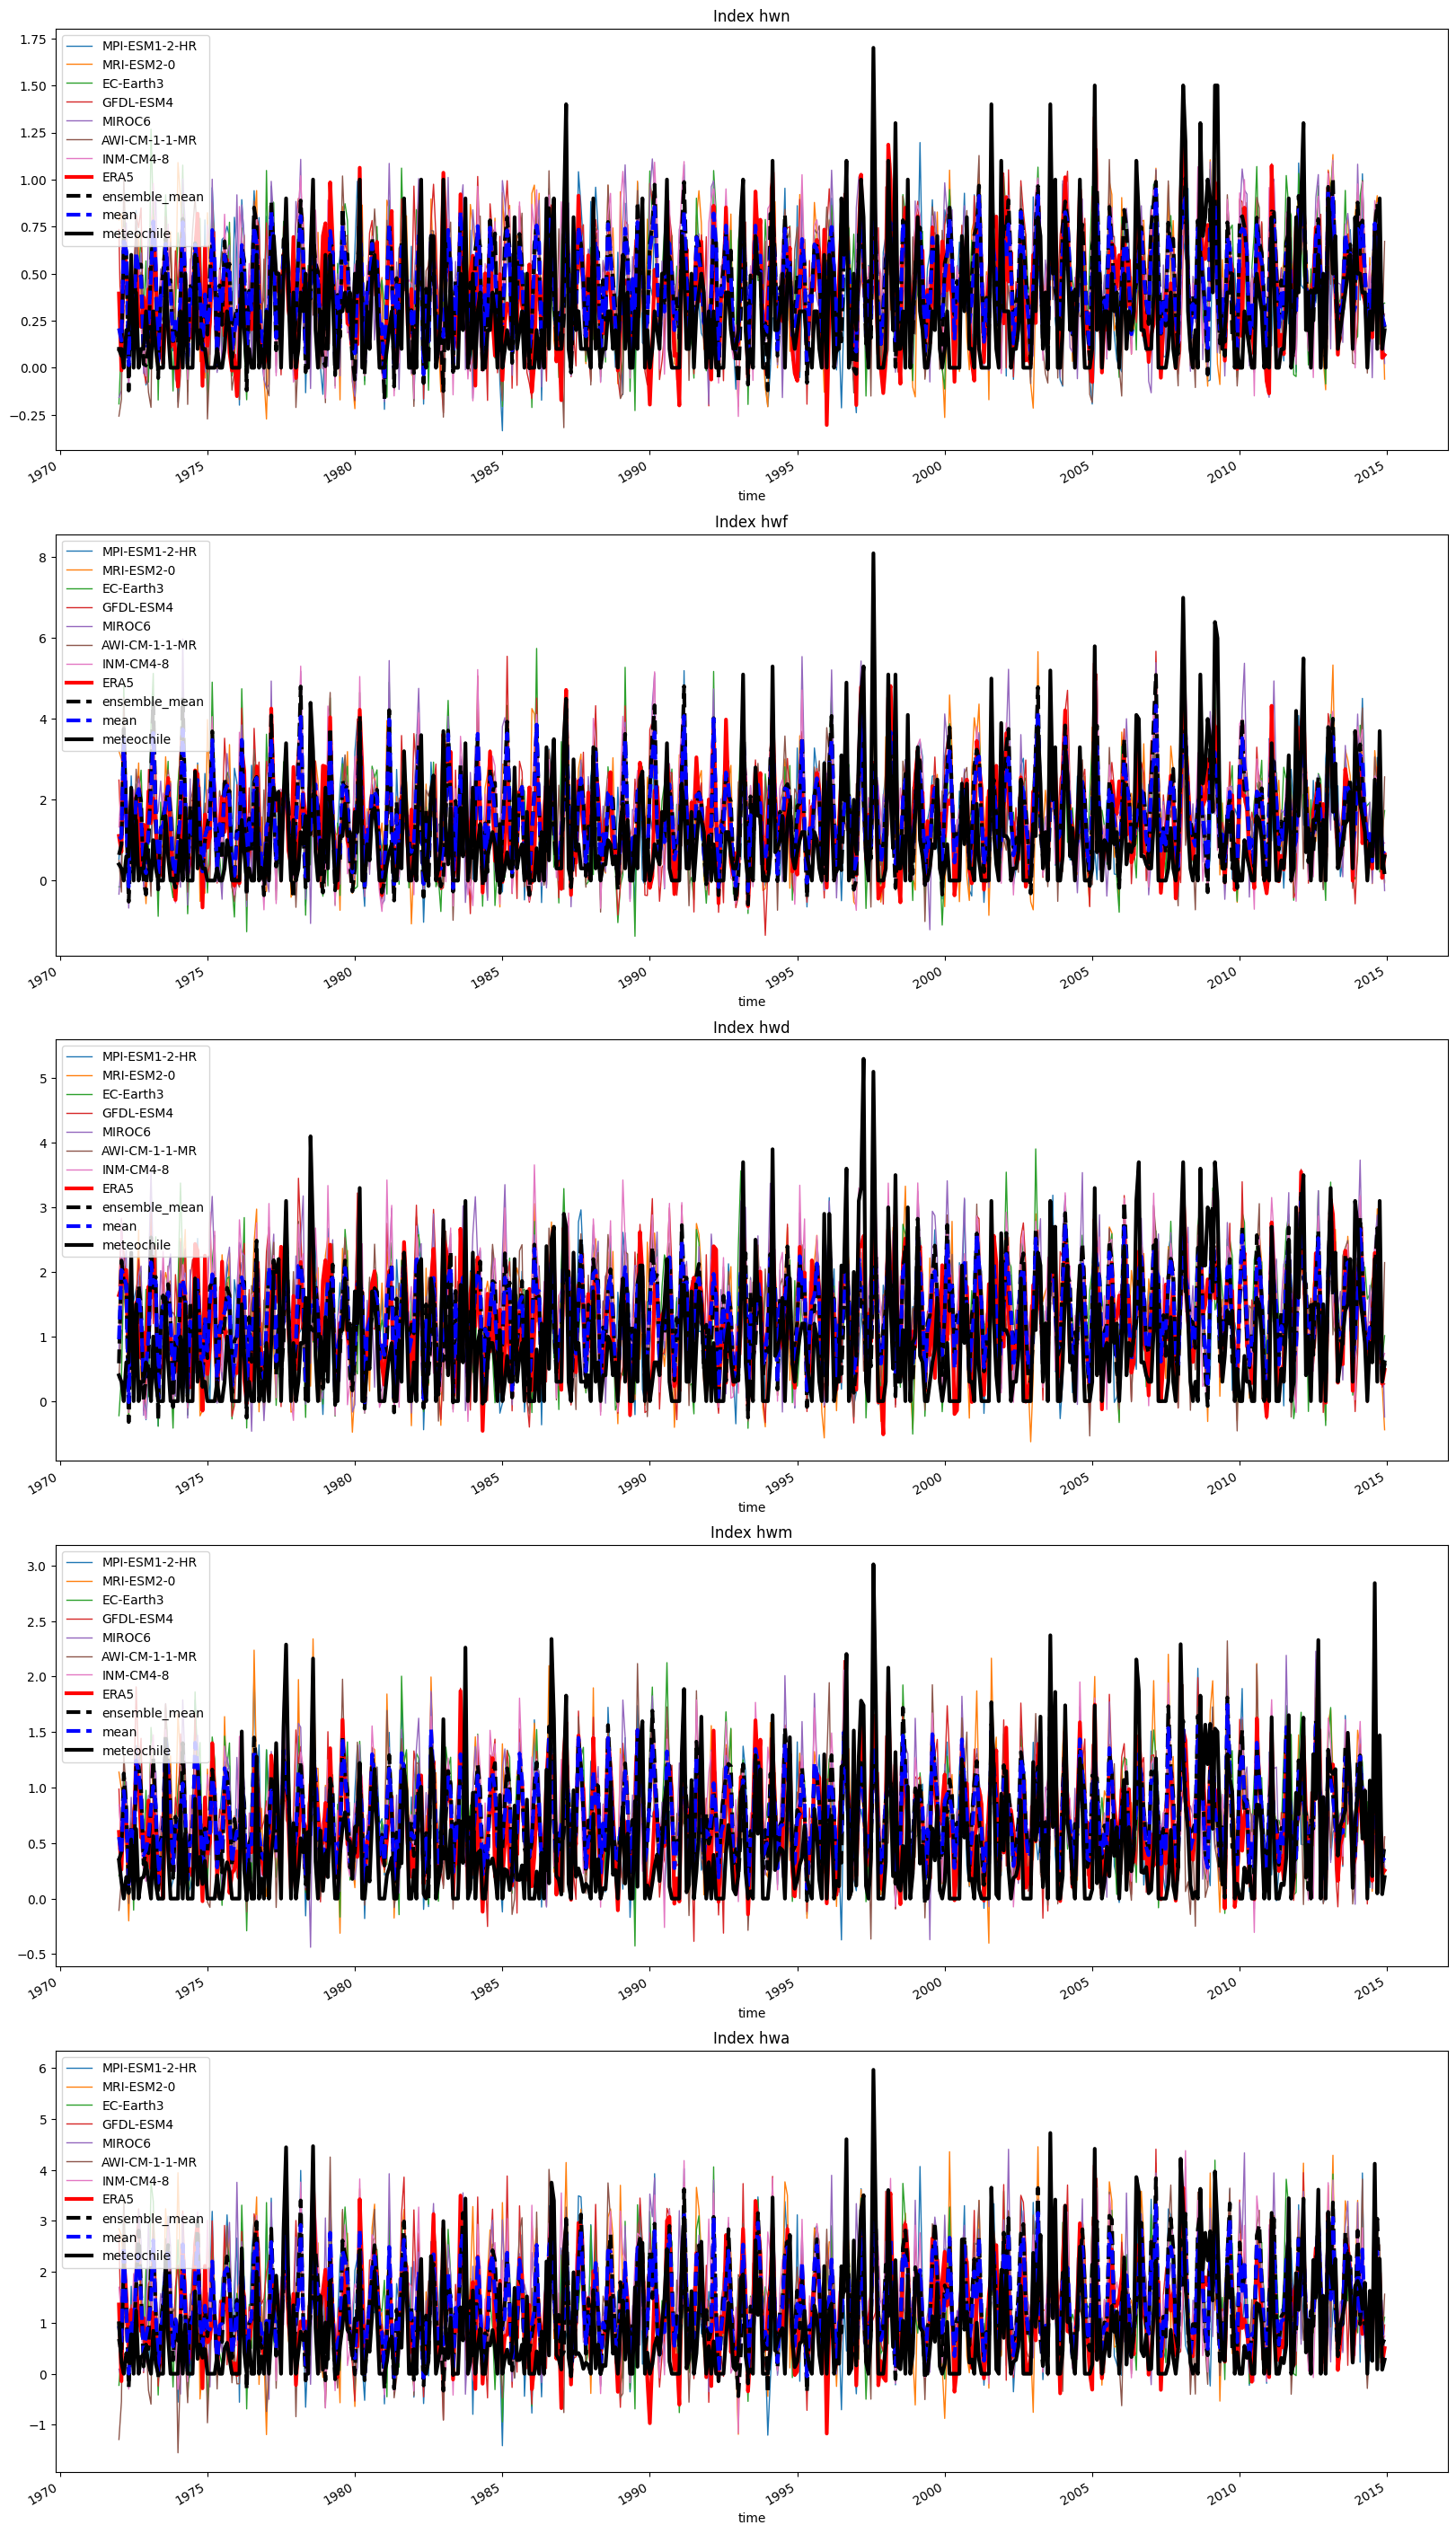

In [21]:
fig, axs = plt.subplots(5, figsize=(20, 40))
for i, index in enumerate(indices_of_interest):
    for model_name in models_predicted.keys():
        if model_name == "meteochile":
            models_predicted[model_name].plot(y=index, ax=axs[i], lw=3, c="black", label="meteochile")
        elif model_name == "ERA5":
            models_predicted[model_name].plot(y=index, ax=axs[i], lw=3, c="red", label=model_name)
        elif model_name == "ensemble_mean":
            models_predicted[model_name].plot(y=index, ax=axs[i], lw=3, c="black", linestyle="--", label=model_name)
        elif model_name == "mean":
            models_predicted[model_name].plot(y=index, ax=axs[i], lw=3, c="blue", linestyle="--", label=model_name)
        else:
            models_predicted[model_name].plot(y=index, ax=axs[i], lw=1, label=model_name)
    axs[i].set_title(f"Index {index}")

In [22]:
models_predicted["mean"] = models_predicted["mean"].astype(np.float64)

In [25]:
models_predicted_yearly = {}
models_predicted_decadal = {}

for name, df in models_predicted.items():
    df = df.sort_index()
    df["decade"] = (df.index.year // 10) * 10
    df["year"] = df.index.year

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for drop_col in ["time", "Date"]:
        if drop_col in numeric_cols:
            numeric_cols.remove(drop_col)

    # Base aggregation rules
    agg_dict = {}
    for col in numeric_cols:
        if col in ['hwn', 'hwf']:
            agg_dict[col] = 'sum'
        elif col in ['hwd', 'hwa']:
            agg_dict[col] = 'max'

    df_year_grouped = df.groupby('year')[numeric_cols].agg(agg_dict)
    df_decadal_grouped = df.groupby('decade')[numeric_cols].agg(agg_dict)

    # Custom aggregation for hwm (weighted mean)
    def weighted_mean(group):
        if group["hwf"].sum() == 0:
            return 0.0
        return (group["hwm"] * group["hwf"]).sum() / group["hwf"].sum()

    hwm_year = df.groupby("year").apply(weighted_mean)
    hwm_decade = df.groupby("decade").apply(weighted_mean)

    # Add hwm back
    df_year_grouped["hwm"] = hwm_year
    df_decadal_grouped["hwm"] = hwm_decade

    models_predicted_yearly[name] = df_year_grouped
    models_predicted_decadal[name] = df_decadal_grouped


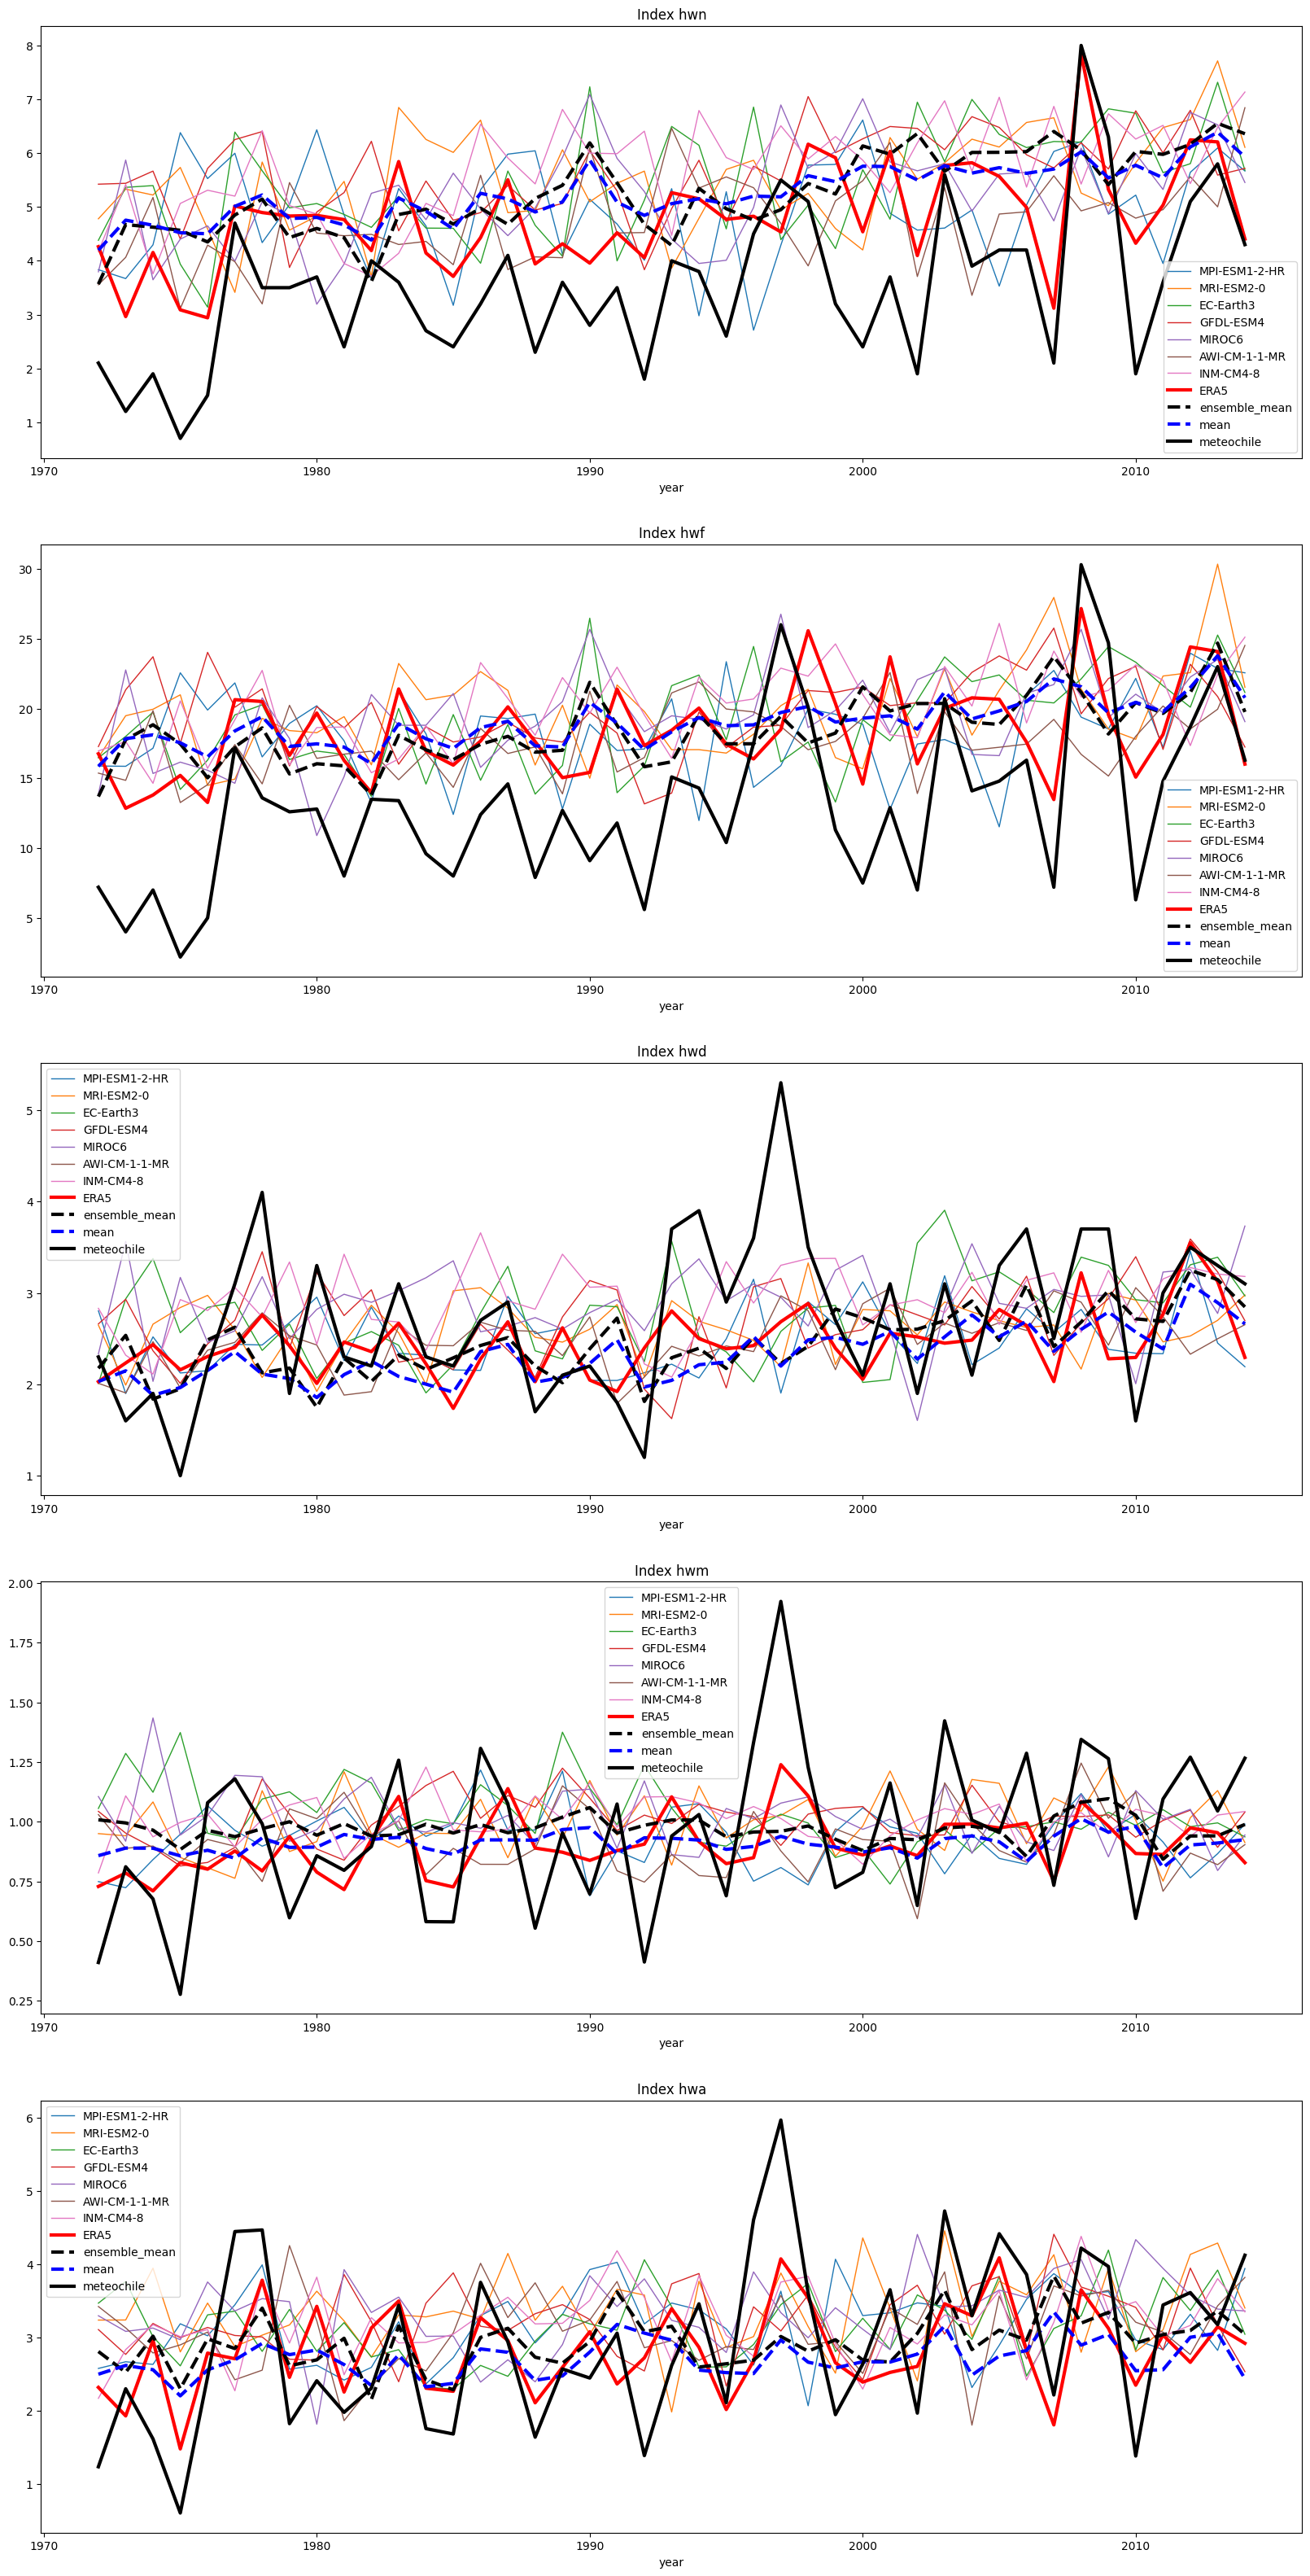

In [26]:
fig, axs = plt.subplots(5, figsize=(20, 40))
for i, index in enumerate(indices_of_interest):
    for model_name in models_predicted_yearly.keys():
        if model_name == "meteochile":
            models_predicted_yearly[model_name].plot(y=index, ax=axs[i], lw=3, c="black", label="meteochile")
        elif model_name == "ERA5":
            models_predicted_yearly[model_name].plot(y=index, ax=axs[i], lw=3, c="red", label=model_name)
        elif model_name == "ensemble_mean":
            models_predicted_yearly[model_name].plot(y=index, ax=axs[i], lw=3, c="black", linestyle="--", label=model_name)
        elif model_name == "mean":
            models_predicted_yearly[model_name].plot(y=index, ax=axs[i], lw=3, c="blue", linestyle="--", label=model_name)
        else:
            models_predicted_yearly[model_name].plot(y=index, ax=axs[i], lw=1, label=model_name)
    axs[i].set_title(f"Index {index}")